In [16]:
import cv2 as cv
from os import getcwd
from os.path import dirname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
image = rf"{dirname(getcwd())}\Scan_sarung.jpg"
print(image)
assert image is not None, "image not found"

k:\python\opencv-extract-image\Scan_sarung.jpg


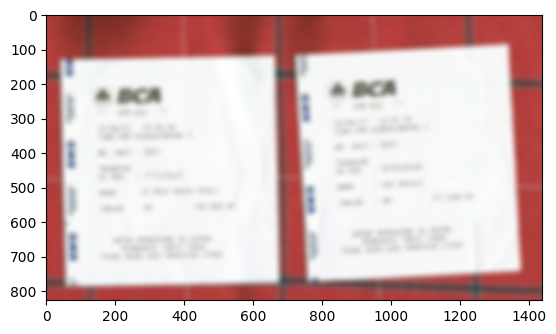

In [18]:
"""
Add gaussian blur to get rid of unnecessary edges
"""
cv_img = cv.imread(image)
cv_img_rotated = cv.rotate(cv_img, cv.ROTATE_90_CLOCKWISE)
img = cv.rotate(cv_img.copy(), cv.ROTATE_90_CLOCKWISE)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.GaussianBlur(img_rgb, tuple(31 for _ in range(2)), 8)  # get rid of unnecessary edges
plt.imshow(blur)

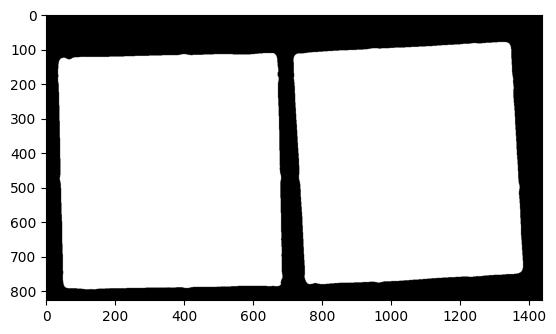

In [19]:
"""
Create a mask
"""
low = 95
max = 255
lower_thresh = tuple(low for _ in range(3))
max_thresh = tuple(max for _ in range(3))
thresh = cv.inRange(blur, lower_thresh, max_thresh)
plt.imshow(thresh, "gray")

2


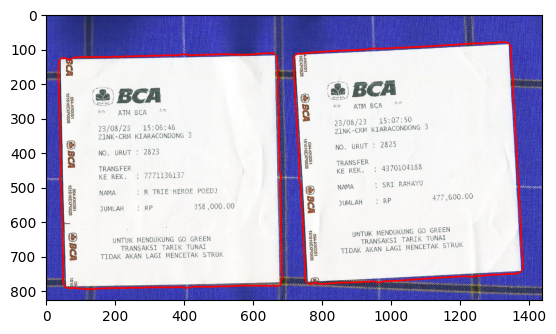

In [20]:
"""
find the contours with 
"""

cont, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
print(len(cont))
cont_image = cv.drawContours(img, cont, -1, 255, 3)

plt.imshow(cont_image, "gray")

In [21]:
"""
find the biggest contour area
"""
area = cv.contourArea(cont[0])
print(area)

425154.5


In [22]:
idx = 0
for c in cont:
    idx += 1
    x, y, w, h = cv.boundingRect(c)
    cv.rectangle(cont_image,(x,y), (x+w,y+h), (0,255,0), 2)
    roi=cv_img_rotated[y:y+h,x:x+w]
    cv.imwrite(str(idx) + '.jpg', roi)     
# cv.imshow('All contours with bounding box', cont_image)
# cv.waitKey(0)